In [33]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [47]:
bucket = 'maxis-problem'
#Output from problem 1 prediction
#includes entries with given and predicted Aging Days
s3uri1 = 's3://maxis-problem/Results/problem-1/Results.csv'

df_pred = pd.read_csv(s3uri1)

In [48]:
df_pred

,LRD,Backup Hour,Aging Days,Power Event Count,DC_Admin_Status,Total_Bank,DC_Technology,DC_Brand_Narada,DC_Brand_Enersys,DC_Brand_Huawei,...,Cooling_System_HEX,Cooling_System_Air Conditioner,Cooling_System_FCU,Cooling_System_FCU Hybrid,CS_Site_Type_Vacant Land,CS_Site_Type_Rooftop,CS_Site_Type_Inbuilding,DC_Capacity_150.0,DC_Capacity_100.0,DC_Capacity_155.0
0,LRD3762,1.0,927.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,LRD6090,3.0,1156.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,LRD4307,3.0,1545.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,LRD17277,5.0,1088.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,LRD3246,5.0,1691.0,1.000000,0.0,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LRD2649,6.0,1507.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5541,LRD2649,0.0,1259.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5542,LRD2649,0.0,1415.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5543,LRD18075,1.0,1296.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [49]:
#Genset cleaning
df_genset = pd.read_excel('Dataset/Genset+Report-06-03-22+14-30 (Masked).xlsx')
df_genset.columns = df_genset.iloc[3]
df_genset = df_genset.iloc[4:]
df_genset = df_genset[['LRD', 'Administrative Status']]
df_genset.dropna(inplace = True)
df_genset.reset_index(drop = True, inplace = True) 
print(f'Size of Genset Dataset: ', df_genset.shape)
df_genset.rename(columns = {'Administrative Status' : 'Genset_Admin_Status'}, inplace = True)
df_genset

Size of Genset Dataset:  (24464, 2)


3,LRD,Genset_Admin_Status
0,LRD0,Decommissioned
1,LRD2,Decommissioned
2,LRD4,Decommissioned
3,LRD5,Decommissioned
4,LRD6,Decommissioned
...,...,...
24459,LRD25452,Decommissioned
24460,LRD25453,Active
24461,LRD25454,Active
24462,LRD25455,Decommissioned


In [50]:
#Dataset 2
merge_PriorityData = pd.merge(df_pred, df_genset, how = "inner", on =["LRD"])
merge_PriorityData.replace({'Decommissioned': 0, 'Planned': 1, 'Active': 2} , inplace = True)
merge_PriorityData

,LRD,Backup Hour,Aging Days,Power Event Count,DC_Admin_Status,Total_Bank,DC_Technology,DC_Brand_Narada,DC_Brand_Enersys,DC_Brand_Huawei,...,Cooling_System_Air Conditioner,Cooling_System_FCU,Cooling_System_FCU Hybrid,CS_Site_Type_Vacant Land,CS_Site_Type_Rooftop,CS_Site_Type_Inbuilding,DC_Capacity_150.0,DC_Capacity_100.0,DC_Capacity_155.0,Genset_Admin_Status
0,LRD3762,1.0,927.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,LRD6090,3.0,1156.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,LRD4307,3.0,1545.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
3,LRD17277,5.0,1088.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
4,LRD3246,5.0,1691.0,1.000000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LRD2649,6.0,1507.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
5541,LRD2649,0.0,1259.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
5542,LRD2649,0.0,1415.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
5543,LRD18075,1.0,1296.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


In [29]:
#Checking distribution of genset status
temp = merge_PriorityData['Genset_Admin_Status'].value_counts()
print(temp)

2    5540
0       3
1       2
Name: Genset_Admin_Status, dtype: int64
2    5540
0       3
1       2
Name: Genset_Admin_Status, dtype: int64


In [52]:
#Use Aging Days and Genset Status as input for KNN model 
KNN_X = merge_PriorityData[['Aging Days', 'Genset_Admin_Status']]
# KNN_X.drop(['LRD'], axis = 1, inplace = True)
#Inverse aging days
#the more the aging days, the lower the priority 
KNN_X['Aging Days'] = KNN_X['Aging Days'].apply(lambda a: 1/a)

In [53]:
KNN_X

,Aging Days,Genset_Admin_Status
0,0.001079,2
1,0.000865,2
2,0.000647,2
3,0.000919,2
4,0.000591,2
...,...,...
5540,0.000664,2
5541,0.000794,2
5542,0.000707,2
5543,0.000772,2


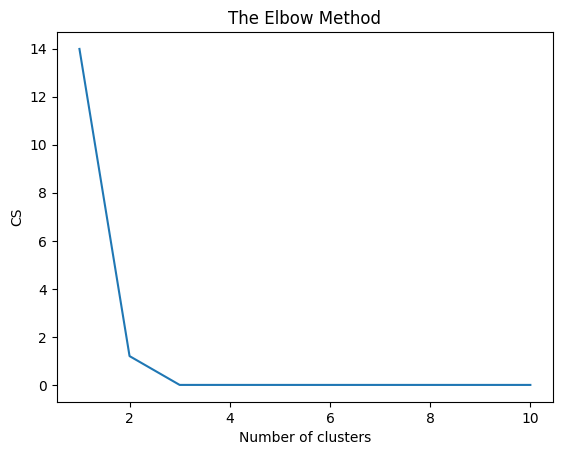

In [54]:
#Elbow method to determine optimal number of cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(KNN_X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [55]:
#Use 5 as cluster number must be odd, and cannot be same as desired categories (3)
kmeans = KMeans(5)
kmeans.fit(KNN_X)
identified_clusters = kmeans.fit_predict(KNN_X)
identified_clusters

array([3, 0, 4, ..., 4, 0, 4], dtype=int32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


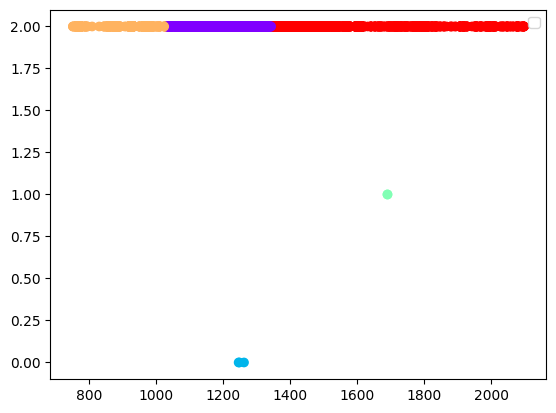

In [56]:
import matplotlib.pyplot as plt 
data_with_clusters = merge_PriorityData.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Aging Days'], data_with_clusters['Genset_Admin_Status'], c = data_with_clusters['Clusters'],cmap='rainbow')
plt.legend()
plt.show()

In [57]:
#Replace predictons with Categories 
tray = {0: 'P1' , 1: 'P2', 2: 'P2', 3: 'P3', 4: 'P2'}

data_with_clusters['Clusters'].replace(tray, inplace = True)

In [58]:
#Determine distribution of each category
#Add new columns (Predicted Category) to df 
temp = data_with_clusters['Clusters'].value_counts()
print(temp)
data_with_clusters

P1    2391
P2    1671
P3    1483
Name: Clusters, dtype: int64


,LRD,Backup Hour,Aging Days,Power Event Count,DC_Admin_Status,Total_Bank,DC_Technology,DC_Brand_Narada,DC_Brand_Enersys,DC_Brand_Huawei,...,Cooling_System_FCU,Cooling_System_FCU Hybrid,CS_Site_Type_Vacant Land,CS_Site_Type_Rooftop,CS_Site_Type_Inbuilding,DC_Capacity_150.0,DC_Capacity_100.0,DC_Capacity_155.0,Genset_Admin_Status,Clusters
0,LRD3762,1.0,927.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P3
1,LRD6090,3.0,1156.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P1
2,LRD4307,3.0,1545.0,1.000000,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,P2
3,LRD17277,5.0,1088.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,P1
4,LRD3246,5.0,1691.0,1.000000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,P2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,LRD2649,6.0,1507.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P2
5541,LRD2649,0.0,1259.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P1
5542,LRD2649,0.0,1415.0,0.250000,0.0,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P2
5543,LRD18075,1.0,1296.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,P1


**Upload predicted values and clusters to bucket**

In [45]:
import boto3
import os

prefix = 'Aging-Days-Complete-Prediction'
data_with_clusters.to_csv('Prediction.csv', index=False)
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'Prediction.csv')).upload_file('Prediction.csv')